## Анализ влияния травм игроков на производительность команд в футбольной Английской Премьер-лиге


### Введение

Ко мне в руки попала база данных, содержащая в себе более 600 подробных записей о травмах футболистов Английской Премьер-лиги с 2019 по 2023 год из семи клубов («Тоттенхэм», «Астон Вилла», «Брайтон», «Арсенал», «Брентфорд», «Эвертон», «Бернли» и «Манчестер Юнайтед»).
На основе этой базы данных я постараюсь выяснить, влияют ли травмы игроков на результаты их команды в чемпионате. При положительном результате я попробую оценить, насколько сильно это влияние.

### Загрузка данных

In [1]:
# Установка зависимостей
!pip install pandas numpy matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Проверка установленных библиотек
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)

Pandas version: 2.2.3
NumPy version: 2.2.1
Matplotlib version: 3.10.0


In [3]:
# Загрузка данных
data = pd.read_csv('player_injuries_impact.csv')

data.head()

,Name,Team Name,Position,Age,Season,FIFA rating,Injury,Date of Injury,Date of return,Match results before injury,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match 1,...,NaN,NaN,Match 2,NaN,NaN,NaN,Match 3,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Result,...,GD,Player rating,Result,Opposition,GD,Player rating,Result,Opposition,GD,Player rating
2,Jamaal Lascelles,Newcastle,Center Back,26.0,2019/20,77.0,Knee injury,"Nov 9, 2019","Jan 13, 2020",draw,...,1,7.1,draw,Everton,0,6.2,draw,Norwich City,0,6.7
3,Fabian Schär,Newcastle,Center Back,28.0,2019/20,79.0,Knee injury,"Oct 20, 2019","Nov 24, 2019",lose,...,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.,N.A.
4,Fabian Schär,Newcastle,Center Back,28.0,2019/20,79.0,Hamstring strain,"Jan 2, 2020","Jan 17, 2020",lose,...,0,6(S),lose,Arsenal,-4,N.A.,lose,Crystal Palace,-1,6.5


In [4]:
data.isna().sum()

Name                           2
Team Name                      2
Position                       2
Age                            2
Season                         2
FIFA rating                    2
Injury                         2
Date of Injury                 2
Date of return                 2
Match results before injury    0
Unnamed: 10                    1
Unnamed: 11                    1
Unnamed: 12                    1
Unnamed: 13                    0
Unnamed: 14                    1
Unnamed: 15                    1
Unnamed: 16                    1
Unnamed: 17                    0
Unnamed: 18                    1
Unnamed: 19                    1
Unnamed: 20                    1
Missed match results           0
Unnamed: 22                    1
Unnamed: 23                    1
Unnamed: 24                    0
Unnamed: 25                    1
Unnamed: 26                    3
Unnamed: 27                    0
Unnamed: 28                    1
Unnamed: 29                    1
Match resu

### Предобработка данных

In [5]:
data = data.iloc[2:]
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

data['Date of Injury'] = pd.to_datetime(data['Date of Injury'], errors='coerce')
data['Date of return'] = pd.to_datetime(data['Date of return'], errors='coerce')

# Обзор изменений
data.head()

,Name,Team Name,Position,Age,Season,FIFA rating,Injury,Date of Injury,Date of return,Match results before injury,Missed match results,Match results after injury
2,Jamaal Lascelles,Newcastle,Center Back,26.0,2019/20,77.0,Knee injury,2019-11-09,2020-01-13,draw,lose,win
3,Fabian Schär,Newcastle,Center Back,28.0,2019/20,79.0,Knee injury,2019-10-20,2019-11-24,lose,draw,N.A.
4,Fabian Schär,Newcastle,Center Back,28.0,2019/20,79.0,Hamstring strain,2020-01-02,2020-01-17,lose,draw,draw
5,Fabian Schär,Newcastle,Center Back,28.0,2019/20,79.0,Shoulder injury,2020-07-16,2020-09-28,lose,draw,N.A.
6,Paul Dummett,Newcastle,Center Back,28.0,2019/20,75.0,Groin injury,2019-12-22,2020-01-10,win,lose,N.A.


In [6]:
data.isna().sum()

Name                            0
Team Name                       0
Position                        0
Age                             0
Season                          0
FIFA rating                     0
Injury                          0
Date of Injury                 83
Date of return                 88
Match results before injury     0
Missed match results            0
Match results after injury      0
dtype: int64

### Анализ данных

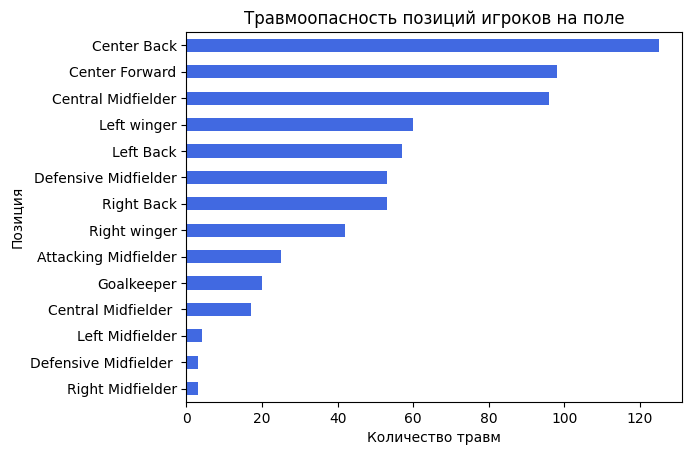

In [7]:
injury_position_counts = data['Position'].value_counts().sort_values(ascending=True)
injury_position_counts.plot(kind='barh', color='royalblue', xlabel='Количество травм', ylabel='Позиция')
plt.title('Травмоопасность позиций игроков на поле')
plt.show()

Интересное наблюдение: с явным преимуществом, чаще всего травму получают игрока центральной зоны (центральные защитники, центральные нападающие и центральные полузащитники). Исходя из данного факта можно сделать вывод, что футбольным менеджерам и боссам английский клубов стоит особенно следить за глубиной состава в центральной зоне поля, чтобы минимизировать влияние отсутствия травмированных игроков на результаты команды в чемпионате.сяца

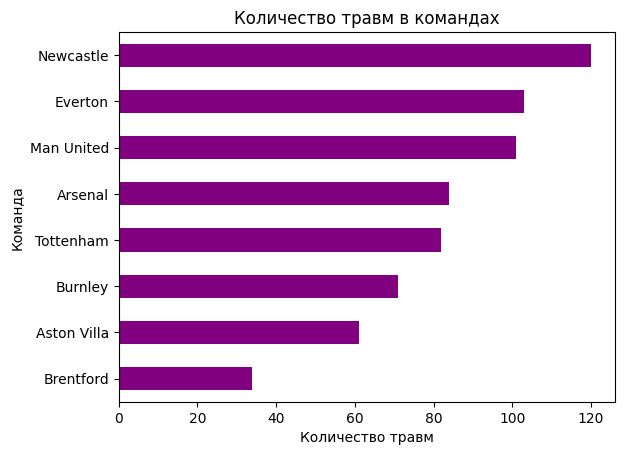

In [8]:
injury_teams_counts = data['Team Name'].value_counts().sort_values(ascending=True)
injury_teams_counts.plot(kind='barh', color='purple', xlabel='Количество травм', ylabel='Команда')
plt.title('Количество травм в командах')
plt.show()

Ньюкасл, Эвертон и Манчестер Юнайтед чаще других команд из выборки страдают от травм игроков. А тренерский штаб Брентфорда в этом аспекте показал наилучшие результаты - под их руководством игроки получали травмы в 3 раза реже, чем подопечные Ньюкасла. Интересно, какие условия и/или факторы влияют на данный показатель.

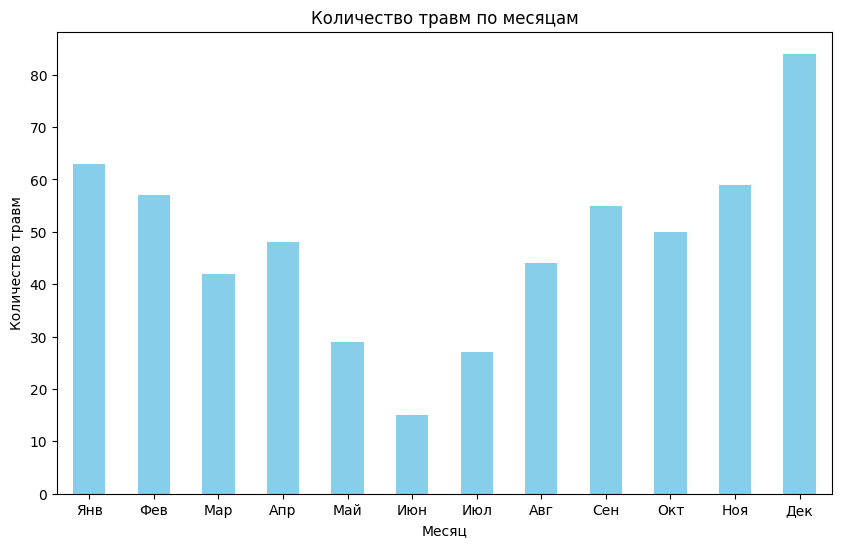

In [9]:
data['Month of Injury'] = data['Date of Injury'].dt.month
injury_counts_by_month = data['Month of Injury'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
injury_counts_by_month.plot(kind='bar', color='skyblue', title='Количество травм по месяцам', xlabel='Месяц', ylabel='Количество травм')
plt.xticks(ticks=np.arange(12), labels=['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'], rotation=0)
plt.show()

Результаты этих статистических данных вполне возможно было предугадать заранее. Чаще всего игрока Премьер-лиги получают травмы в самый разгар сезона, в котором есть лишь несколько дней на рождественский перерыв. В этом направлении исследования я вижу потенциал, очень даже вероятно влияние на этот показатель не только плотного игрового графика, но и погодных условий. Очевидно, что с ноября по февраль в Англии наихудшая в году погода для большого футбола.

In [10]:
# Разбиение игроков по рейтингу FIFA на 3 группы
bins = [data['FIFA rating'].min(), 76, 80, data['FIFA rating'].max()]
labels = ['Низкий рейтинг FIFA', 'Средний рейтинг FIFA', 'Высокий рейтинг FIFA']
data['group FIFA rating'] = pd.cut(data['FIFA rating'], bins=bins, labels=labels, include_lowest=True)
print(data.groupby('group FIFA rating', observed=False)['FIFA rating'].agg(['min', 'max', 'count']).reset_index())

      group FIFA rating   min   max  count
0   Низкий рейтинг FIFA  66.0  76.0    200
1  Средний рейтинг FIFA  77.0  80.0    261
2  Высокий рейтинг FIFA  81.0  90.0    195


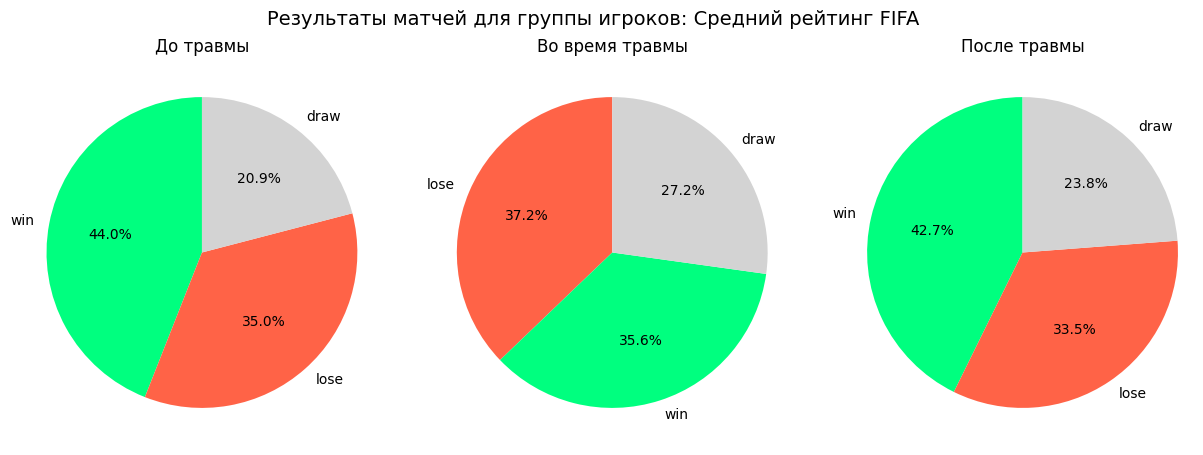

Группа игроков: Средний рейтинг FIFA.

    Изменения показателей команды в отсутствие травмированного игрока:
    победы: -8.38%
    ничьи: 6.26%
    поражения: 2.12%

    Изменения показателей команды после возвращения травмированного игрока:
    победы: 7.09%
    ничьи: -3.42%
    поражения: -3.67%


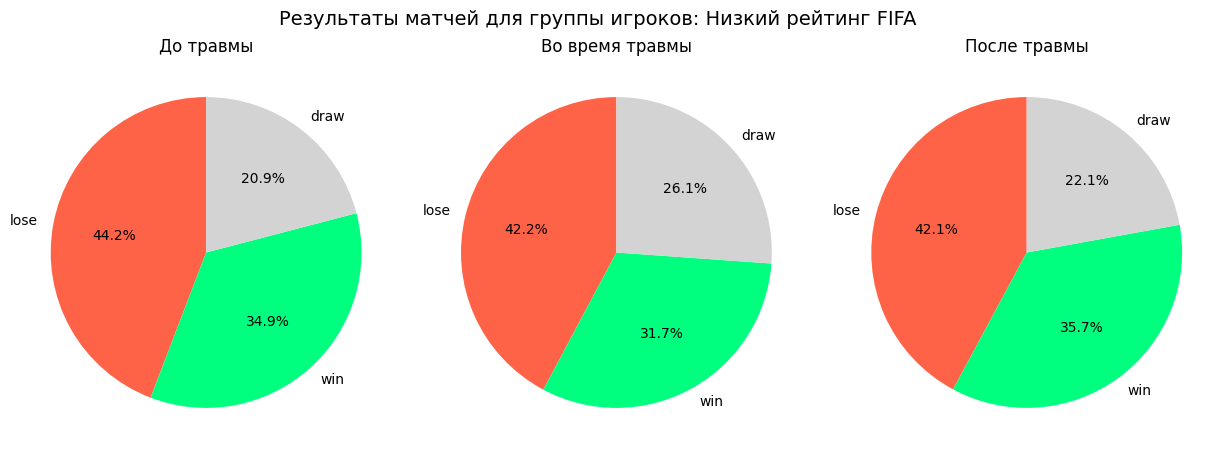

Группа игроков: Низкий рейтинг FIFA.

    Изменения показателей команды в отсутствие травмированного игрока:
    победы: -3.23%
    ничьи: 5.20%
    поражения: -1.97%

    Изменения показателей команды после возвращения травмированного игрока:
    победы: 4.06%
    ничьи: -3.99%
    поражения: -0.07%


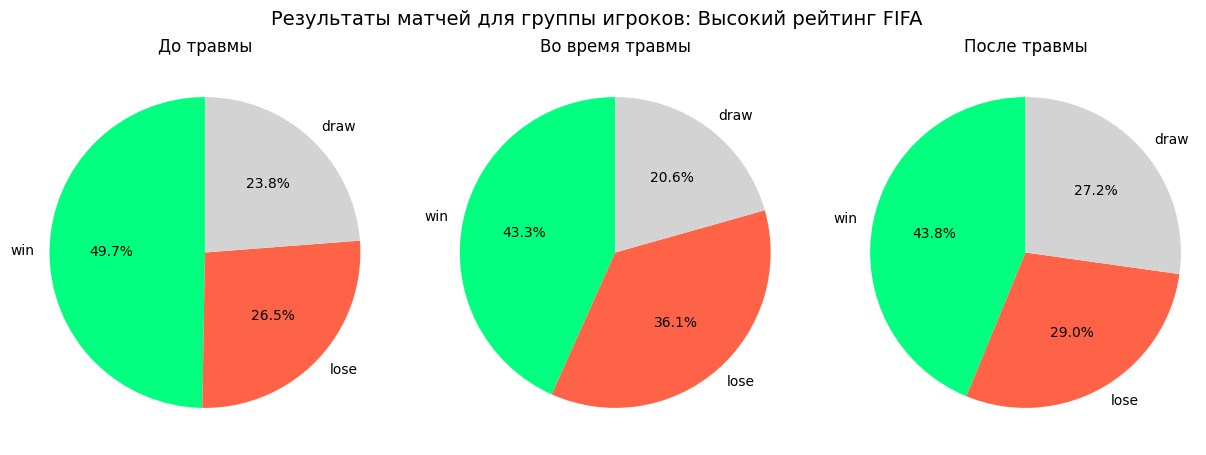

Группа игроков: Высокий рейтинг FIFA.

    Изменения показателей команды в отсутствие травмированного игрока:
    победы: -6.43%
    ничьи: -3.17%
    поражения: 9.60%

    Изменения показателей команды после возвращения травмированного игрока:
    победы: 0.49%
    ничьи: 6.60%
    поражения: -7.09%


In [11]:
# Определение цветов для секторов
def get_colors(results):
    colors = []
    for result in results.index:
        if result == 'win':
            colors.append('springgreen')
        elif result == 'draw':
            colors.append('lightgray')
        elif result == 'lose':
            colors.append('tomato')
    return colors

# Визуализация результатов для каждой группы
for group in data['group FIFA rating'].unique():
    group_data = data[data['group FIFA rating'] == group]

    # Подготовка данных для круговых диаграмм
    before_results = group_data['Match results before injury'].value_counts()
    before_results = before_results[before_results.index != 'N.A.']
    missed_results = group_data['Missed match results'].value_counts()
    missed_results = missed_results[missed_results.index != 'N.A.']
    after_results = group_data['Match results after injury'].value_counts()
    after_results = after_results[after_results.index != 'N.A.']

    # Создание фигуры для круговых диаграмм
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Результаты матчей для группы игроков: {group}', fontsize=14)

    # Круговая диаграмма для результатов до травмы
    axs[0].pie(before_results, labels=before_results.index, autopct='%1.1f%%', startangle=90, colors=get_colors(before_results))
    axs[0].axis('equal')
    axs[0].set_title('До травмы')

    # Круговая диаграмма для результатов во время травмы
    axs[1].pie(missed_results, labels=missed_results.index, autopct='%1.1f%%', startangle=90, colors=get_colors(missed_results))
    axs[1].axis('equal')
    axs[1].set_title('Во время травмы')

    # Круговая диаграмма для результатов после травмы
    axs[2].pie(after_results, labels=after_results.index, autopct='%1.1f%%', startangle=90, colors=get_colors(after_results))
    axs[2].axis('equal')
    axs[2].set_title('После травмы')

    plt.show()

    # Анализ резулдьтатов
    before_wins = before_results.get('win', 0)
    before_draws = before_results.get('draw', 0)
    before_loses = before_results.get('lose', 0)

    missed_wins = missed_results.get('win', 0)
    missed_draws = missed_results.get('draw', 0)
    missed_loses = missed_results.get('lose', 0)

    after_wins = after_results.get('win', 0)
    after_draws = after_results.get('draw', 0)
    after_loses = after_results.get('lose', 0)

    total_before = before_wins + before_draws + before_loses
    total_missed = missed_wins + missed_draws + missed_loses
    total_after = after_wins + after_draws + after_loses

    win_miss_percent = ((missed_wins / total_missed) - (before_wins / total_before)) * 100
    draw_miss_percent = ((missed_draws / total_missed) - (before_draws / total_before)) * 100
    lose_miss_percent = ((missed_loses / total_missed) - (before_loses / total_before)) * 100

    win_after_percent = ((after_wins / total_after) - (missed_wins / total_missed)) * 100
    draw_after_percent = ((after_draws / total_after) - (missed_draws / total_missed)) * 100
    lose_after_percent = ((after_loses / total_after) - (missed_loses / total_missed)) * 100
    
    print(f'Группа игроков: {group}.')
    
    print(f"""
    Изменения показателей команды в отсутствие травмированного игрока:
    победы: {win_miss_percent:.2f}%
    ничьи: {draw_miss_percent:.2f}%
    поражения: {lose_miss_percent:.2f}%""")

    print(f"""
    Изменения показателей команды после возвращения травмированного игрока:
    победы: {win_after_percent:.2f}%
    ничьи: {draw_after_percent:.2f}%
    поражения: {lose_after_percent:.2f}%""")

### Вывод

Мы произвели общий анализ влияния травм игроков на производительность их команд в Английской Премьер-лиге, вот какие итоги можно подвести:
- ярче всего на эффективности команды отображается потеря футболиста с высоким рейтингом FIFA, это закономерно, так как такие игроки, как правило, являются сильнейшими футболимстами в своих командах, а значит неизбежэно несут на себе бремя лидеров
- так же можно наблюдать сильное воздействие потери игрока среднего уровня FIFA, особенно выделяются реезультаты команды при возвращении таких футболистов; чаще всего это футболисты стартового состава, которые составляют костяк команды наравне со звёздными игроками
- отсутствие игроков низкого уровня FIFA глобально остаётся незамеченным и не отображается на общих результатах команды

В той или иной степени, но потеря футболистов из-за травм действительно сказывается на результатах команд Английской Премьер-лиги, если, конечно, говорить об игроках, приближенных к стартовому составу, в нашей работе они относились к группам Высокого и Среднего рейтинга FIFA.